In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Regression analysis

- Onderzoek relatie tussen afhankelijke (target) variabele en onafhankelijke (predictor) variabelen
- We nemen aan dat de target een lineaire combinatie is van inputs 
\begin{align*}
    y &= f(\mathbf{x}) + \epsilon\\
    y &= \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_d x_d + \epsilon
\end{align*}
waarbij:
- $y$ is de afhankelijke target variabele is
- $\mathbf{x} = (x_1, x_2, \dots, x_d)$ zijn de onafhankelijke predictors
- $\epsilon$ is de random error (ruis) die niet reduceerbaar is

Regressie analyse geeft antwoord op de vraag:
- Hoe veranderd $y$ als $x_i$ veranderd, terwijl $\mathbf{x}/x_i$ constant blijven?

We gaan kijken naar:
- Lineaire regressie
- Polynomiale regressie

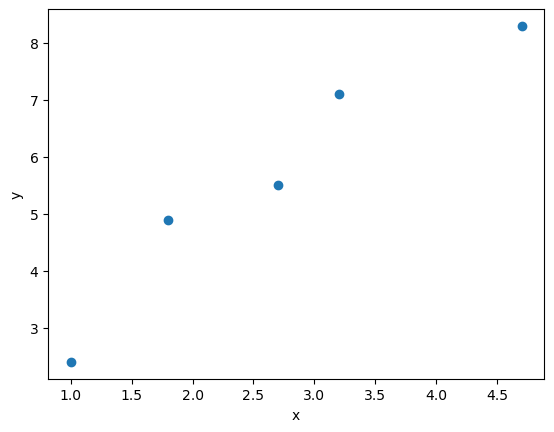

In [2]:
df = np.array([
    [1,   2.4],
    [1.8, 4.9],
    [2.7, 5.5],
    [3.2, 7.1],
    [4.7, 8.3],
], dtype='float32')

x = df[:, 0]
y = df[:, 1]

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Linear regression

We gebruiken een lineaire lijn om $y = f(\mathbf{x}) + \epsilon$ te schatten
$$
    \hat{y} = \hat{\beta_0} + \hat{\beta_1} x_1 + \hat{\beta_2} x_2 + \dots + \hat{\beta_d} x_d
$$
waarbij:
- $(\hat{\beta_0}, \hat{\beta_1}, \hat{\beta_2}, \dots, \hat{\beta_d})$ de gewichten (parameters/coefficienten) zijn van de regressielijn

Als er 1 input dimensie is, $x$, dan berekenen we $\hat{\beta_0}$ en $\hat{\beta_1}$ als volgt:

\begin{align*}
    \hat{y} &= \hat{\beta_0} + \hat{\beta_1} x\\\\
    \hat{\beta_1} &= r \times \dfrac{\sigma_y}{\sigma_x}\\
    \hat{\beta_0} &= \bar{y} - \hat{\beta_1} \bar{x}
\end{align*}

Waarbij:
- $r$ is de Pearson correlatie coefficient tussen $x$ en $y$
- $\sigma_x, \sigma_y$ zijn de standaard deviatie van $x, y$, respectievelijk
- $\bar{x}, \bar{y}$ zijn de mean gemiddelden van $x, y$, respectievelijk

In [3]:
# mean, std, en z-score voor x
x_mean = x.mean()
x_std = x.std()
z_x = (x-x_mean)/x_std

# mean, std, en z-score voor y
y_mean = y.mean()
y_std = y.std()
z_y = (y-y_mean)/y_std

n = df.shape[0]

r = np.sum(z_x*z_y)/n

b1 = r * y_std/x_std
b0 = y_mean-b1*x_mean

b0, b1, r

(1.51816814679922, 1.5379971867680033, 0.9630218505859375)

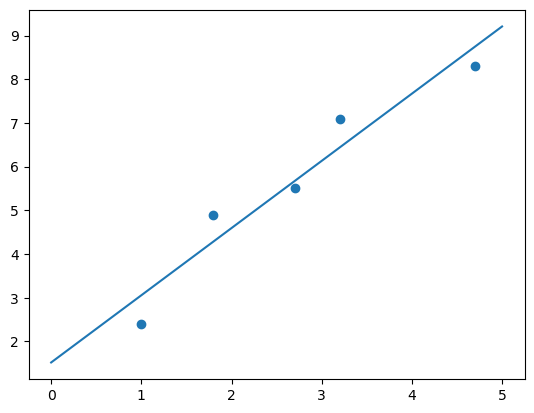

In [4]:
f = lambda x: b0 + x * b1

plt.scatter(x, y)
plt.plot([0, 5], [f(0), f(5)])

In [5]:
# Valideer met LinearRegression van Sklearn
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x.reshape(-1, 1), y)

reg.intercept_, reg.coef_[0]

(1.5181684, 1.5379971)

In [6]:
b0, b1

(1.51816814679922, 1.5379971867680033)

### Multiple linear regression

Als we meer dat 1 input predictor hebben

https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset 

In [7]:
from sklearn.datasets import load_diabetes

df = load_diabetes(as_frame=True)

X = df.data.values
y = df.target.values

df.data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [8]:
from sklearn.model_selection import train_test_split

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

Text(0, 0.5, 'target y')

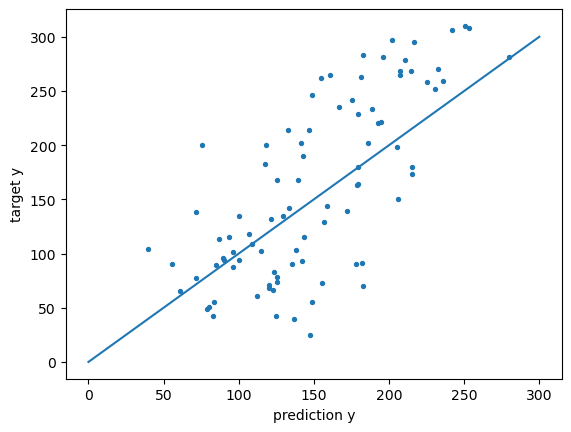

In [9]:
reg = LinearRegression().fit(X_train, y_train)

y_preds = reg.predict(X_test)

plt.scatter(y_preds, y_test, s=8)
plt.plot([0, 300], [0, 300])
plt.xlabel("prediction y")
plt.ylabel("target y")

$$
    MSE = \dfrac{1}{N} \sum_{i=0}^N (y_i - \hat{y}_i)^2
$$

In [10]:
MSE = np.mean((y_preds - y_test)**2)

MSE

3219.934164008809

In [11]:
RMSE = MSE**.5

RMSE

56.74446373003105

In [12]:
coefs = {n: b for b, n in zip(reg.coef_, df.feature_names)}

coefs

{'age': 54.9073343379187,
 'sex': -278.12730517718757,
 'bmi': 507.9102687019854,
 'bp': 295.69126830702623,
 's1': -741.0959257465081,
 's2': 462.2457554957366,
 's3': 32.74611204616033,
 's4': 101.73631834745828,
 's5': 728.685293171606,
 's6': 48.31013051682867}

### Polynomial regression

Hetzelfde lineair model, maar er is een preprocessing stap die we doen:
$$
    \mathbf{x}_p = \begin{bmatrix}
        x^0 & 
        x^1 & 
        x^2 & 
        \dots & 
        x^n
    \end{bmatrix}
$$
Nu krijgen we een polynomiaal model van orde $n$:
\begin{align*}
    \hat{y} &= \hat{\beta_0} x^0 + \hat{\beta_1} x^1 + \hat{\beta_2} x^2 + \dots + \hat{\beta_n} x^n
\end{align*}

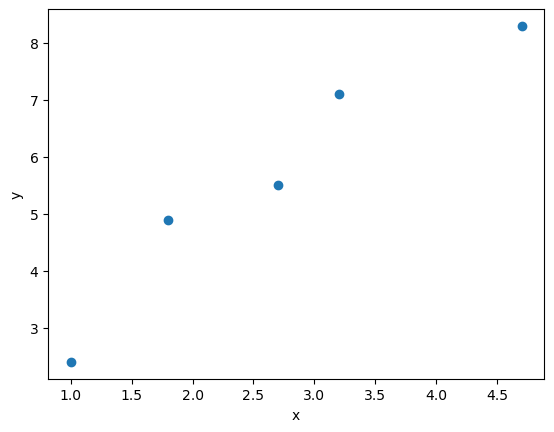

In [13]:
df = np.array([
    [1,   2.4],
    [1.8, 4.9],
    [2.7, 5.5],
    [3.2, 7.1],
    [4.7, 8.3],
], dtype='float32')

x = df[:, 0]
y = df[:, 1]

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [14]:
# Polynomiaal van orde 4
X_poly = np.array([x**0, x**1, x**2, x**3, x**4]).T
X_poly

array([[  1.       ,   1.       ,   1.       ,   1.       ,   1.       ],
       [  1.       ,   1.8      ,   3.2399998,   5.8319993,  10.497599 ],
       [  1.       ,   2.7      ,   7.2900004,  19.683    ,  53.144104 ],
       [  1.       ,   3.2      ,  10.240001 ,  32.768    , 104.857605 ],
       [  1.       ,   4.7      ,  22.089998 , 103.82299  , 487.96802  ]],
      dtype=float32)

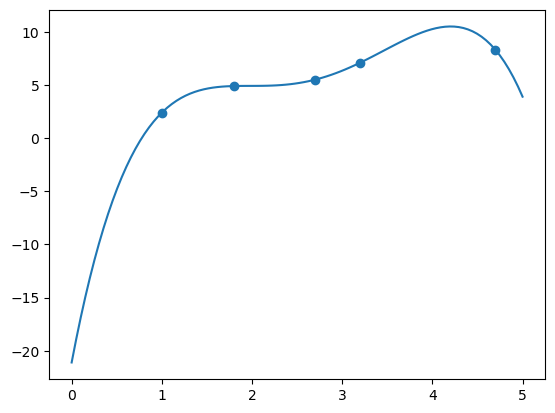

In [15]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_poly, y)

plt.scatter(x, y)

xi = np.linspace(0, 5, 100)
Xi = np.array([xi**0, xi**1, xi**2, xi**3, xi**4]).T

plt.plot(xi, reg.predict(Xi))
plt.show()

Wat gebeurt er als we verschillende waarden voor $n$ nemen?

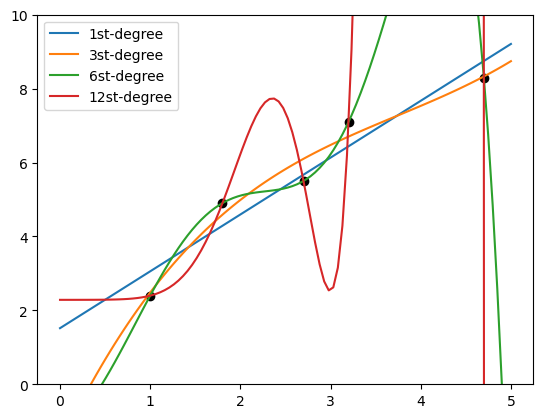

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

plt.scatter(x, y, c='black')

poly_degrees = [1, 3, 6, 12]

for degree in poly_degrees:
    # preprocess training data
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_x = poly.fit_transform(x.reshape(-1, 1))

    # regress on polynomial data
    poly_reg = LinearRegression().fit(poly_x, y)

    # predict
    xi = np.linspace(0, 5, 100)
    poly_xi = poly.fit_transform(xi.reshape(-1, 1))
    plt.plot(xi, poly_reg.predict(poly_xi), label=f"{degree}st-degree")

plt.ylim([0, 10])
plt.legend()
plt.show()

### Experiment: Polynomial Regression

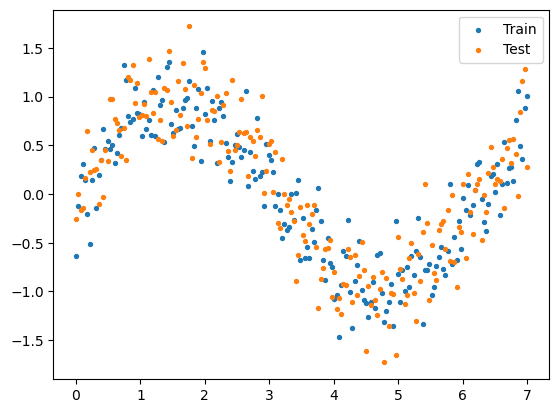

In [17]:
N = 200
x_train = np.linspace(0, 7, N)
y_train = np.sin(x_train) + np.random.normal(0.0, 0.3, size=N)

x_test = np.linspace(0, 7, N)
y_test = np.sin(x_test) + np.random.normal(0.0, 0.3, size=N)

plt.scatter(x_train, y_train, s=8, label="Train")
plt.scatter(x_test, y_test, s=8, label="Test")
plt.legend()
plt.show()

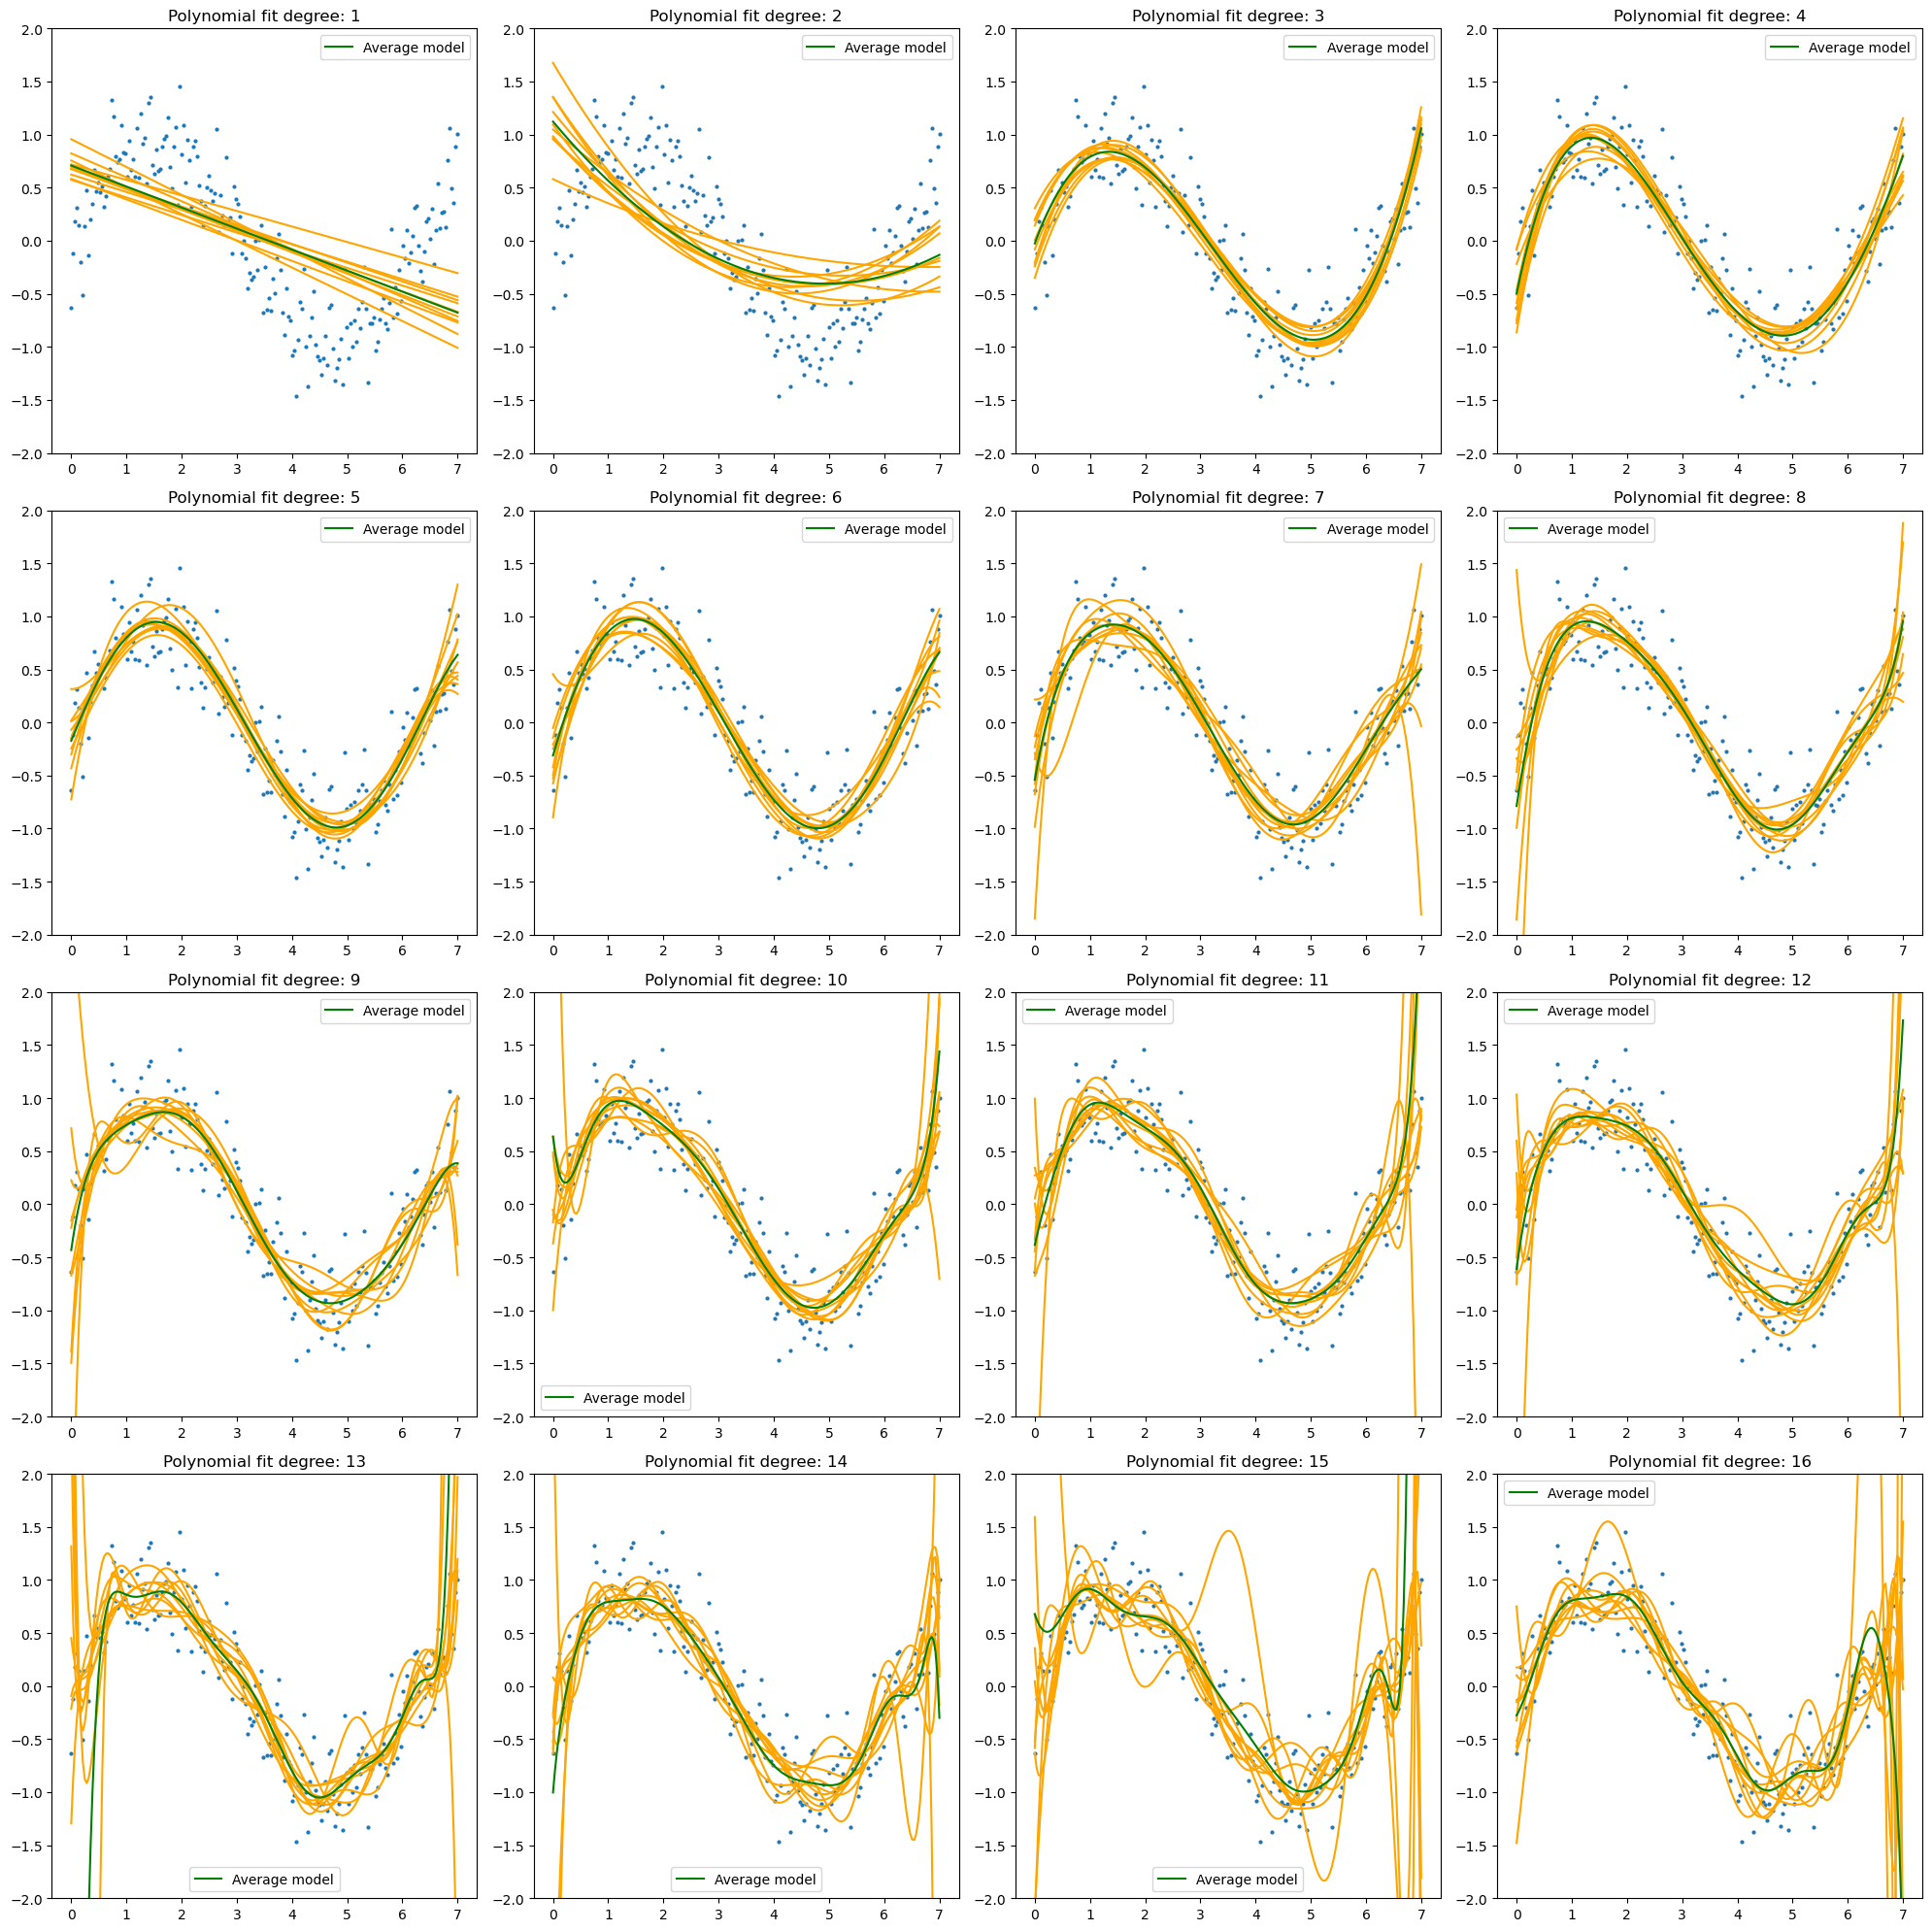

In [18]:
# experiment parameters
sample_size = 40
num_models = 10

dimx, dimy = 4, 4
fig, axes = plt.subplots(dimx, dimy, figsize=(5*dimy, 5*dimx))
axes = axes.flatten()

errors = []
num_degrees = len(axes)

for j in range(num_degrees):
    degree = j+1
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    
    axes[j].set_ylim((-2, 2))
    axes[j].set_title(f"Polynomial fit degree: {degree}")
    axes[j].scatter(x_train, y_train, s=4)

    model_y = []
    error = 0.0

    for i in range(num_models):

        # sample from training set
        idx = np.random.choice(x_train.shape[0], size=sample_size, replace=False)
        x_sample = x_train[idx]
        y_sample = y_train[idx]
        
        poly_x = poly.fit_transform(x_sample.reshape(-1, 1))

        # train polynomial regression model
        poly_reg = LinearRegression().fit(poly_x, y_sample)
        
        # plot trained model
        y_preds = poly_reg.predict(poly.fit_transform(x_train.reshape(-1, 1)))
        axes[j].plot(x_train, y_preds, c='orange')
        
        # save predictions
        model_y.append(y_preds)

        # calculate error on test set
        y_preds = poly_reg.predict(poly.fit_transform(x_test.reshape(-1, 1)))
        error += np.mean((y_test - y_preds)**2) # add MSE to total error
    
    average_y = np.mean(model_y, axis=0)
    errors.append((degree, error/num_models))

    axes[j].plot(x_train, average_y, c='green', label="Average model")
    axes[j].legend()

plt.tight_layout()

In [19]:
sorted(errors, key=lambda x: x[1])

[(5, 0.10690906474785378),
 (6, 0.11053157161229918),
 (4, 0.11797742072755002),
 (3, 0.12439016459199599),
 (7, 0.1356827556217408),
 (8, 0.14433121795269915),
 (9, 0.16100517397001426),
 (10, 0.19582221501475877),
 (12, 0.25715030292744956),
 (14, 0.384344437224731),
 (2, 0.3927999624435661),
 (1, 0.4374264729857401),
 (11, 0.5872519502592285),
 (16, 2.3941064467574487),
 (13, 54.07268699506902),
 (15, 102.9554657388112)]

### Bias-Variance trade-off

**Bias**: hoeveel foutieve aannames maakt het model

**Variance**: hoeveel verschilt het model bij verschillende datasets 

Gegeven een estimator model $\hat{f}(x)$ en het ground-truth model $f(x)$ kunnen we stellen dat:
- Als $\text{Complexity}(\hat{f}) > \text{Complexity}(f)$ dan is er sprake van **overfitting**
- Als $\text{Complexity}(\hat{f}) < \text{Complexity}(f)$ dan is er sprake van **underfitting**
- Als $\text{Complexity}(\hat{f}) \approx \text{Complexity}(f)$ dan is er een balans tussen **bias/variance**

*Complexity* meet hoe complex/capabel een model is  

### Opdrachten

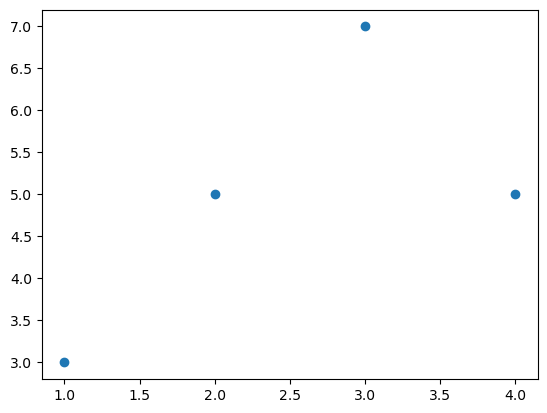

In [46]:
df = np.array([
    [1, 3],
    [2, 5],
    [3, 7],
    [4, 5],
], dtype='float32')

x = df[:, 0]
y = df[:, 1]
plt.scatter(x, y)

#### Linear regression by hand

In [47]:
# mean, std, en z-score voor x
x_mean = x.mean()
x_std = x.std()
z_x = (x-x_mean)/x_std

# mean, std, en z-score voor y
y_mean = y.mean()
y_std = y.std()
z_y = (y-y_mean)/y_std

n = df.shape[0]

r = np.sum(z_x*z_y)/n

b1 = r * y_std/x_std
b0 = y_mean-b1*x_mean

b0, b1, r

(3.0000002655229707, 0.7999998937908117, 0.6324554681777954)

In [48]:
# np.corrcoef(df.T)
pd.DataFrame(df).corr()

,0,1
0,1.000000,0.632456
1,0.632456,1.000000


Alternatieve berekeningen voor $r$:
\begin{align*}
    &r = \frac{\sum (x_i - \overline{\mathbf{x}}) (y_i - \overline{\mathbf{y}})}{\sqrt{\sum (x_i - \overline{\mathbf{x}})^2 \sum (y_i - \overline{\mathbf{y}})^2}}\\[2em]
    &r = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
\end{align*}


In [49]:
np.sum((x - x_mean) * (y - y_mean))/(np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2)))

0.6324555

In [50]:
covariance_matrix = np.cov(df, bias=True, rowvar=False)/(x_std*y_std)
covariance_matrix[0, 1]

0.6324555243639827

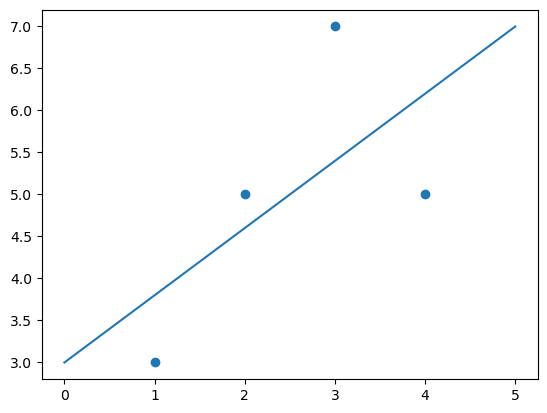

In [51]:
f = lambda x: b0 + x * b1

plt.scatter(x, y)
plt.plot([0, 5], [f(0), f(5)])

Root mean squared error:
$$
    RMSE = \sqrt{\frac{\sum_{i=1}^N (\hat{y_i} - y_i)^2}{N}}
$$

In [52]:
RMSE = np.sqrt(np.mean((y - f(x))**2))
RMSE

1.0954453

Controleer en vergelijk met `LinearRegression` van sklearn

In [53]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(x.reshape(-1, 1), y)
(lin_reg.coef_[0], lin_reg.intercept_)

(0.79999995, 3.0)

In [54]:
(b1, b0)

(0.7999998937908117, 3.0000002655229707)

#### Leave One Out Cross Validation (LOOCV)

In [66]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

loocv = LeaveOneOut()
y_true = []
y_pred = []

for i, (train_index, test_index) in enumerate(loocv.split(x)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    
    x_train = x[train_index].reshape(-1, 1)
    y_train = y[train_index]
    x_test = x[test_index].reshape(-1, 1)
    y_test = y[test_index]

    model = LinearRegression().fit(x_train, y_train)
    y_hat = model.predict(x_test)
    
    y_pred.append(y_hat[0])
    y_true.append(y_test[0])

Fold 0:
  Train: index=[1 2 3]
  Test:  index=[0]
Fold 1:
  Train: index=[0 2 3]
  Test:  index=[1]
Fold 2:
  Train: index=[0 1 3]
  Test:  index=[2]
Fold 3:
  Train: index=[0 1 2]
  Test:  index=[3]


In [56]:
MSE = mean_squared_error(y_true, y_pred)
MSE, MSE**0.5

(7.1655326, 2.676851245205594)

#### ROC curve met Logistic regression

In [31]:
from sklearn.datasets import load_breast_cancer

df_bc = load_breast_cancer(as_frame=True).frame
df_bc

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Check generieke informatie

In [32]:
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Check op missing values

In [33]:
df_bc.isnull().values.any()

False

Train/test split van dataset

In [34]:
from sklearn.model_selection import train_test_split

X = df_bc.iloc[:, :-1]
y = df_bc.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [35]:
from sklearn.linear_model import LogisticRegression

logit_reg = LogisticRegression(solver='liblinear').fit(X_train, y_train)

# probabilistic predictions in range [0, 1]
y_pred_proba = logit_reg.predict_proba(X_test)

# binary predictions 0 or 1
y_pred = logit_reg.predict(X_test)

In [36]:
pred_results = pd.DataFrame({
    'actual': y_test,
    'p(0)': y_pred_proba[:, 0].ravel(),
    'p(1)': y_pred_proba[:, 1].ravel(),
    'predicted': y_pred
})

pred_results

,actual,p(0),p(1),predicted
148,1,0.045579,9.544211e-01,1
247,1,0.120117,8.798830e-01,1
453,1,0.006746,9.932544e-01,1
529,1,0.002337,9.976631e-01,1
26,0,0.972626,2.737369e-02,0
...,...,...,...,...
60,1,0.001393,9.986070e-01,1
462,1,0.073716,9.262836e-01,1
1,0,1.000000,5.080027e-08,0
517,0,0.999992,8.167577e-06,0


(1.0, 0.9285714285714286)

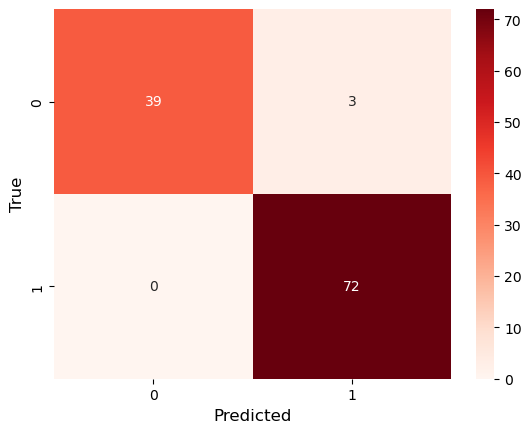

In [40]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(pred_results['actual'], pred_results['predicted'])
df_cm = pd.DataFrame(cm, index=[0, 1], columns=[0, 1])

sns.heatmap(df_cm, annot=True, cmap='Reds')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

tn, fp, fn, tp = cm.ravel()

sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)

sensitivity, specificity

FPR = [0.         0.07142857 1.        ]
TPR = [0. 1. 1.]


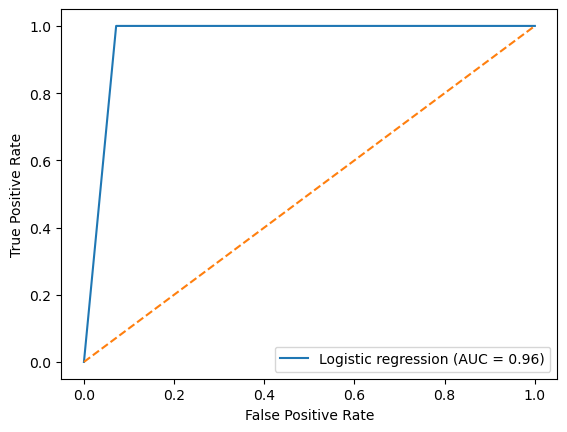

In [68]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

fpr, tpr, tresholds = roc_curve(pred_results['actual'], pred_results['predicted'], pos_label=1)

print(f"FPR = {fpr}")
print(f"TPR = {tpr}")

roc_auc = auc(fpr, tpr)

roc_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic regression')
roc_disp.plot()
plt.plot([0, 1], [0, 1], '--')
plt.show()

Merk op

In [43]:
(pred_results['p(1)'] > 0.5)*1

148    1
247    1
453    1
529    1
26     0
      ..
60     1
462    1
1      0
517    0
373    0
Name: p(1), Length: 114, dtype: int32

In [44]:
pred_results['predicted']

148    1
247    1
453    1
529    1
26     0
      ..
60     1
462    1
1      0
517    0
373    0
Name: predicted, Length: 114, dtype: int32